# **Sales trends and  average price of avocados in the US 2015-2018**

In [24]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## Persiapan data.
#### 4046, 4225, 4770 merupakan PLU/SKU Hass Avocado berdasarkan berat dan ukuran.

In [25]:
avcd = pd.read_csv(r"C:\Users\USER\avocado.csv") 
avcd.drop(['Unnamed: 0','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags'], axis=1, inplace=True)
avcd.rename(columns={'Total Volume':'TotalVolume'},inplace=True)
avcd['Date'] = pd.to_datetime(avcd['Date'])
avcd.head()

,Date,AveragePrice,TotalVolume,type,year,region
0,2015-12-27,1.33,64236.62,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,conventional,2015,Albany


In [73]:
avcd.tail()

,Date,AveragePrice,TotalVolume,type,year,region
18244,2018-02-04,1.63,17074.83,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,organic,2018,WestTexNewMexico


In [74]:
avcd.describe

<bound method NDFrame.describe of             Date  AveragePrice  TotalVolume          type  year  \
0     2015-12-27          1.33     64236.62  conventional  2015   
1     2015-12-20          1.35     54876.98  conventional  2015   
2     2015-12-13          0.93    118220.22  conventional  2015   
3     2015-12-06          1.08     78992.15  conventional  2015   
4     2015-11-29          1.28     51039.60  conventional  2015   
...          ...           ...          ...           ...   ...   
18244 2018-02-04          1.63     17074.83       organic  2018   
18245 2018-01-28          1.71     13888.04       organic  2018   
18246 2018-01-21          1.87     13766.76       organic  2018   
18247 2018-01-14          1.93     16205.22       organic  2018   
18248 2018-01-07          1.62     17489.58       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...  

## Harga rata-rata Jan 2015 - Jan 2018

Text(0, 0.5, 'Average Price in USD')

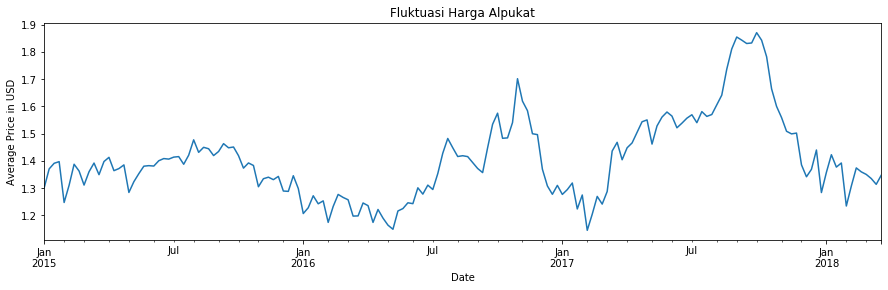

In [26]:
avcd_date=avcd.groupby('Date').mean()
avcd_date.AveragePrice.plot(figsize=(15,4))
plt.title('Fluktuasi Harga Alpukat')
plt.ylabel('Average Price in USD')

## Harga rata-rata berdasarkan type

Text(0, 0.5, 'Average Price in USD')

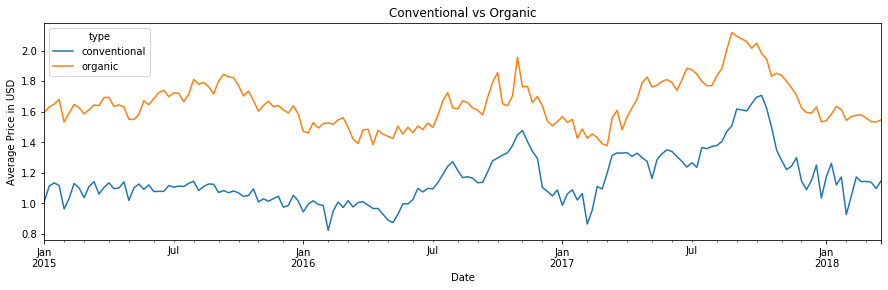

In [27]:
avcd_date_t=avcd.pivot_table(index='Date', columns='type', aggfunc='mean')['AveragePrice']
avcd_date_t.plot(figsize=(15,4))
plt.title('Conventional vs Organic')
plt.ylabel('Average Price in USD')

#### Secara general, tren harga alpukat meningkat. Harga alpukat organik lebih tinggi dari konvensional dikarenakan biaya produksi yang lebih tinggi.

## Fluktuasi harga per musim

In [28]:
x=[]
for i in range(len(avcd)):
    m=avcd['Date'].loc[i].strftime("%B")
    x.append(m)
avcd['month']=x
month_order={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}

Text(0, 0.5, 'Average Price in USD')

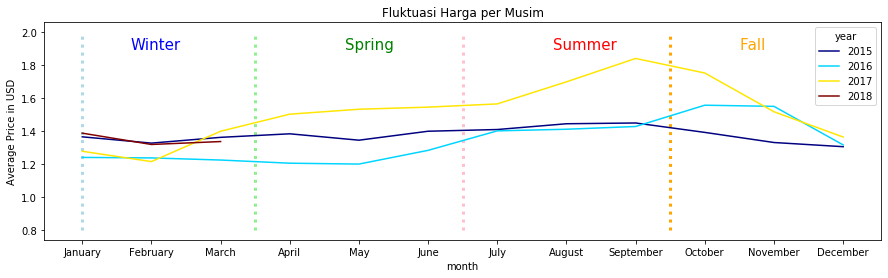

In [29]:
avcd_year=avcd.pivot_table(index='month', columns='year', aggfunc='mean')['AveragePrice']
fig=avcd_year.loc[month_order].plot(figsize=(15,4), xticks=range(0,13), cmap='jet')
fig.set_facecolor('white')
plt.text(x=0.7, y=1.9, s='Winter', color='blue', fontsize=15)
plt.vlines(x=0, ymin=0.8, ymax=2, color='lightblue', linestyles=':', linewidth=3)
plt.text(x=3.8, y=1.9, s='Spring', color='green', fontsize=15)
plt.vlines(x=2.5, ymin=0.8, ymax=2, color='lightgreen', linestyles=':', linewidth=3)
plt.text(x=6.8, y=1.9, s='Summer', color='red', fontsize=15)
plt.vlines(x=5.5, ymin=0.8, ymax=2, color='pink', linestyles=':', linewidth=3)
plt.text(x=9.5, y=1.9, s='Fall', color='orange', fontsize=15)
plt.vlines(x=8.5, ymin=0.8, ymax=2, color='orange', linestyles=':', linewidth=3)
plt.title('Fluktuasi Harga per Musim')
plt.ylabel('Average Price in USD')

#### Pada tahun 2015 harga alpukat cenderung stabil. Pada tahun 2016 harga meninggkat dengan perlahan. Dan pada tahun 2017 terjadi peningkatan signifikan di musim panas.

## Fluktuasi volume penjualan

Text(0, 0.5, 'Total Volume')

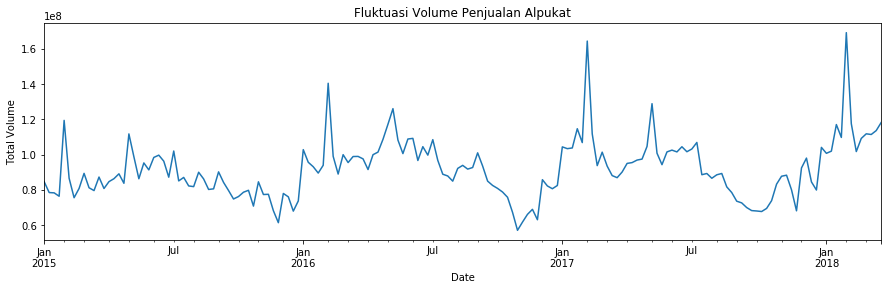

In [30]:
avcd_vol=avcd.groupby('Date').sum()
avcd_vol.TotalVolume.plot(figsize=(15,4))
plt.title('Fluktuasi Volume Penjualan Alpukat')
plt.ylabel('Total Volume')

Text(0, 0.5, 'Total Volume')

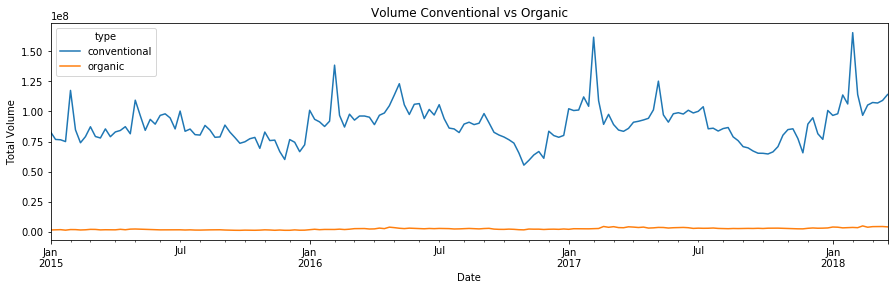

In [31]:
avcd_vol_t=avcd.pivot_table(index='Date', columns='type', aggfunc='sum')
avcd_vol_t.plot(y='TotalVolume', figsize=(15,4), title='Volume Conventional vs Organic')
plt.ylabel('Total Volume')

#### Penjualan alpukat konvensional fluktuatif, sementara penjualan organik cenderung stagnan. Mungkin hal ini dikarenakan harga alpukat organik yang signifikan lebih tinggi.

## Fluktuasi volume penjualan per musim

In [32]:
y=[]
a=avcd_date.index
for i in range(len(avcd_date)):
    m=a[i].strftime("%B")
    y.append(m)
avcd_date['month']=y

Text(0, 0.5, 'Total Volume')

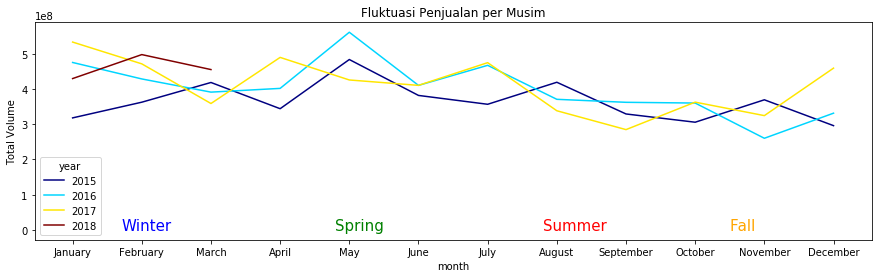

In [34]:
avcd_year=avcd.pivot_table(index='month', columns='year', aggfunc='sum')['TotalVolume']
fig=avcd_year.loc[month_order].plot(figsize=(15,4), xticks=range(0,13), cmap='jet')
fig.set_facecolor('white')
plt.text(x=0.7, y=1.9, s='Winter', color='blue', fontsize=15)
plt.vlines(x=0, ymin=0.8, ymax=2, color='lightblue', linestyles=':', linewidth=3)
plt.text(x=3.8, y=1.9, s='Spring', color='green', fontsize=15)
plt.vlines(x=2.5, ymin=0.8, ymax=2, color='lightgreen', linestyles=':', linewidth=3)
plt.text(x=6.8, y=1.9, s='Summer', color='red', fontsize=15)
plt.vlines(x=5.5, ymin=0.8, ymax=2, color='pink', linestyles=':', linewidth=3)
plt.text(x=9.5, y=1.9, s='Fall', color='orange', fontsize=15)
plt.vlines(x=8.5, ymin=0.8, ymax=2, color='orange', linestyles=':', linewidth=3)
plt.title('Fluktuasi Penjualan per Musim')
plt.ylabel('Total Volume')

#### Tren penjualan menanjak dari musim dingin sampai musim semi.

## Harga alpukat berdasarkan wilayah

In [12]:
west=avcd.loc[avcd['region']=='West']
southeast=avcd.loc[avcd['region']=='Southeast']
southcentral=avcd.loc[avcd['region']=='SouthCentral']
plains=avcd.loc[avcd['region']=='Plains']
northeast=avcd.loc[avcd['region']=='Northeast']
midsouth=avcd.loc[avcd['region']=='Midsouth']
totalus=avcd.loc[avcd['region']=='TotalUS']

In [13]:
df=pd.merge(west, southeast, on='Date', suffixes=('_west', '_southeast'))
df=pd.concat([west, southeast])
df1=pd.concat([df,southcentral])
df2=pd.concat([df1,plains])
df3=pd.concat([df2,northeast])
df4=pd.concat([df3,midsouth])
df5=pd.concat([df4,totalus])
df5_price=df5.pivot_table(index='Date', columns='region', aggfunc='mean')['AveragePrice']

Text(0.5, 1.0, 'Fluktuasi Harga per Wilayah')

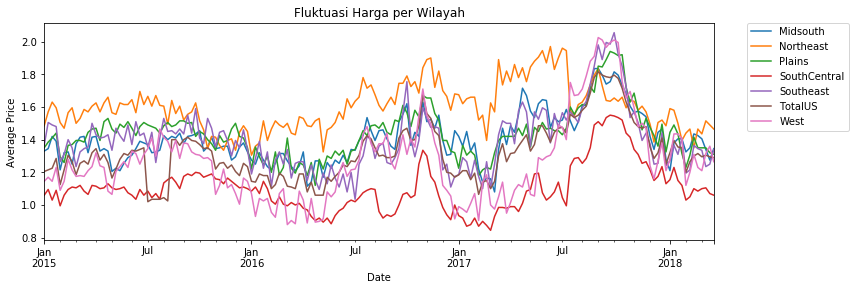

In [16]:
df5_price.plot(kind='line', figsize=(12,4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Average Price')
plt.title('Fluktuasi Harga per Wilayah')

#### Harga rerata terendah ada di wilayah South Central sedangkan harga tertinggi ada di wilayah Northeast. Hal ini dipengaruhi jarak wilayah dari produsen alpukat yang berada di Amerika Selatan.

## Volume penjualan berdasarkan wilayah

Text(0.5, 1.0, 'Fluktuasi Penjualan per Wilayah')

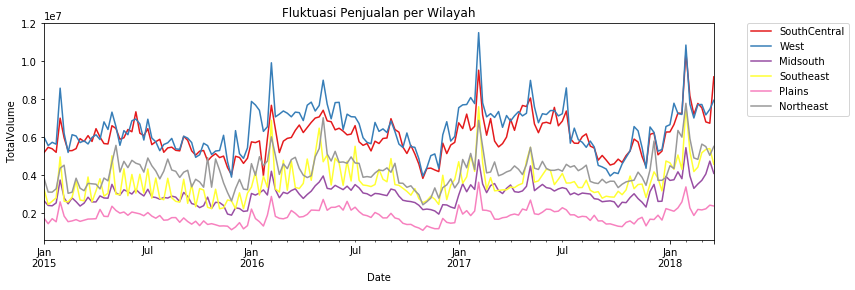

In [19]:
df5_volume=df5.pivot_table(index='Date', columns='region', aggfunc='sum')['TotalVolume']
df5_volume[['SouthCentral', 'West', 'Midsouth', 'Southeast', 'Plains', 'Northeast']].plot(kind='line', figsize=(12,4), cmap='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('TotalVolume')
plt.title('Fluktuasi Penjualan per Wilayah')

#### Penjualan tertinggi terjadi di wilayah West sedangkan penjualan terendah ada di wilayah Plains. Mungkin hal ini dipengaruhi oleh demografi penduduk milenial.